In [1]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

%matplotlib inline
label_size = 22 + 2
tick_size = 20 + 2
title_size = 24 + 2
legend_size = 18

plt.rcParams["font.family"] = "Palatino"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [2]:
np.random.seed(42)

pmfs = np.array([[0.152, 0.157, 0.192, 0.424, 0.075],
                 [0.048, 0.443, 0.113, 0.112, 0.284],
                 [0.030, 0.556, 0.062, 0.086, 0.266]])

names = ['lt-at-ct', 'lt-at-al', 'lt-at-ca']

boots = {}

for i, name in enumerate(names):
    observations = np.repeat(np.arange(0, 5), (pmfs[i] * 1000).astype(int))
    p_ij_s = []
    for _ in range(1000):
        subsamples = np.random.choice(observations, 750, replace=True)
        subsample_pmfs = np.array([np.sum(subsamples == j) / 750 for j in range(5)])
        # p(i, j | i, j, k)
        p_ij = subsample_pmfs[[0, 1]].sum()
        p_ij_s.append(p_ij)
    boots[name] = p_ij_s

In [3]:
boots_df = pd.DataFrame(boots)
boots_df

,lt-at-ct,lt-at-al,lt-at-ca
0,0.298667,0.496000,0.562667
1,0.328000,0.524000,0.589333
2,0.322667,0.517333,0.581333
3,0.306667,0.502667,0.574667
4,0.302667,0.501333,0.593333
...,...,...,...
995,0.280000,0.494667,0.561333
996,0.305333,0.494667,0.600000
997,0.309333,0.497333,0.597333
998,0.326667,0.486667,0.578667


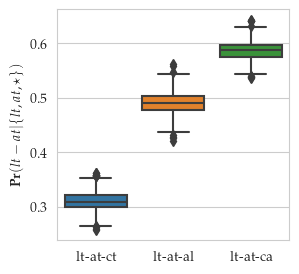

In [4]:
fig, ax = plt.subplots(figsize=(3, 3))
sns.boxplot(data=boots_df, ax=ax)
ax.set_ylabel(r'$\textbf{Pr}(lt-at | \{lt,at,\star\})$')
fig.savefig('plots/bootstrap_two_row.pdf', bbox_inches='tight')